In [1]:
from TechnicalIndicators import get_TI
from DataPreprocessing import *
from Model import LSTM_model
from LoadData import stock_price
from FundamentalIndicators import get_FI_for_model
from matplotlib import pyplot

Using TensorFlow backend.


Model works good enough with VIX, DXY, but it needs to converge, achives 55.3% with val loss of .6897

In [11]:
Company = 'XOM'
df = stock_price(Company, "1992-12-31", "2018-12-31")

batch_size = 30 #30, 50
n_days = 5 #5

# df = get_FI_for_model(df)
df = get_TI(df)

(reframed_train_x, reframed_train_y), (reframed_test_x, reframed_test_y) = ready_data(df, split_ratio=0.9, batch_size=batch_size, n_days=n_days)

history, model = LSTM_model(reframed_train_x, reframed_train_y, reframed_test_x, reframed_test_y, n_days, batch_size, epochs=200)

Train X shape: (5845, 5, 10)
Train Y shape: (5845,) 
Test X shape:(625, 5, 10) 
Test Y shape: (625,)

Proportion of Target variable. 
Test set: 0.5032 
Train set: 0.5019

Train on 5845 samples, validate on 625 samples
Epoch 1/200
5845/5845 [==============================] - 4s 651us/step - loss: 0.6936 - acc: 0.5127 - val_loss: 0.6929 - val_acc: 0.5152
Epoch 2/200
5845/5845 [==============================] - 2s 302us/step - loss: 0.6927 - acc: 0.5112 - val_loss: 0.6929 - val_acc: 0.5088
Epoch 3/200
5845/5845 [==============================] - 2s 298us/step - loss: 0.6928 - acc: 0.5158 - val_loss: 0.6926 - val_acc: 0.5216
Epoch 4/200
5845/5845 [==============================] - 2s 385us/step - loss: 0.6927 - acc: 0.5145 - val_loss: 0.6927 - val_acc: 0.5280
Epoch 5/200
5845/5845 [==============================] - 2s 291us/step - loss: 0.6929 - acc: 0.5122 - val_loss: 0.6925 - val_acc: 0.5184
Epoch 6/200
5845/5845 [==============================] - 2s 273us/step - loss: 0.6930 - acc: 0.51

Epoch 59/200
5845/5845 [==============================] - 1s 250us/step - loss: 0.6878 - acc: 0.5485 - val_loss: 0.6915 - val_acc: 0.5344
Epoch 60/200
5845/5845 [==============================] - 1s 244us/step - loss: 0.6888 - acc: 0.5408 - val_loss: 0.6915 - val_acc: 0.5440
Epoch 61/200
5845/5845 [==============================] - 1s 244us/step - loss: 0.6882 - acc: 0.5494 - val_loss: 0.6915 - val_acc: 0.5392
Epoch 62/200
5845/5845 [==============================] - 1s 243us/step - loss: 0.6875 - acc: 0.5453 - val_loss: 0.6916 - val_acc: 0.5376
Epoch 63/200
5845/5845 [==============================] - 1s 246us/step - loss: 0.6878 - acc: 0.5444 - val_loss: 0.6917 - val_acc: 0.5424
Epoch 64/200
5845/5845 [==============================] - 1s 244us/step - loss: 0.6875 - acc: 0.5423 - val_loss: 0.6919 - val_acc: 0.5440
Epoch 65/200
5845/5845 [==============================] - 1s 245us/step - loss: 0.6870 - acc: 0.5506 - val_loss: 0.6921 - val_acc: 0.5312
Epoch 66/200
5845/5845 [==========

5845/5845 [==============================] - 1s 236us/step - loss: 0.6811 - acc: 0.5555 - val_loss: 0.6961 - val_acc: 0.5120
Epoch 119/200
5845/5845 [==============================] - 1s 241us/step - loss: 0.6799 - acc: 0.5636 - val_loss: 0.6963 - val_acc: 0.5104
Epoch 120/200
5845/5845 [==============================] - 1s 242us/step - loss: 0.6803 - acc: 0.5607 - val_loss: 0.6964 - val_acc: 0.5024
Epoch 121/200
5845/5845 [==============================] - 1s 242us/step - loss: 0.6803 - acc: 0.5574 - val_loss: 0.6967 - val_acc: 0.5152
Epoch 122/200
5845/5845 [==============================] - 1s 241us/step - loss: 0.6813 - acc: 0.5574 - val_loss: 0.6966 - val_acc: 0.5104
Epoch 123/200
5845/5845 [==============================] - 1s 241us/step - loss: 0.6809 - acc: 0.5562 - val_loss: 0.6967 - val_acc: 0.5168
Epoch 124/200
5845/5845 [==============================] - 1s 241us/step - loss: 0.6806 - acc: 0.5588 - val_loss: 0.6966 - val_acc: 0.5008
Epoch 125/200
5845/5845 [================

In [ ]:
model.evaluate(reframed_test_x, reframed_test_y)

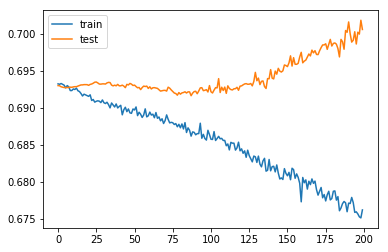

In [9]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

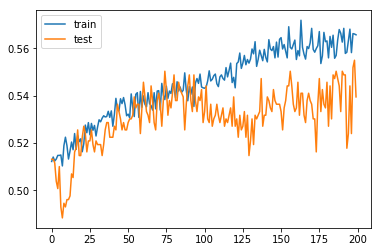

In [10]:
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
test_x=reframed_train_x[500:1000]
test_y=reframed_train_y[500:1000]



model.evaluate(test_x, test_y)

In [ ]:
reframed_train_x.shape